In [2]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt

# Skewed Distributions, Percentiles and Box Plots

Let us create a skewed distribution using `scipy.stats.skewnorm`. The resulting distribution is plotted below, along with a solid line at the positioned at the mean.

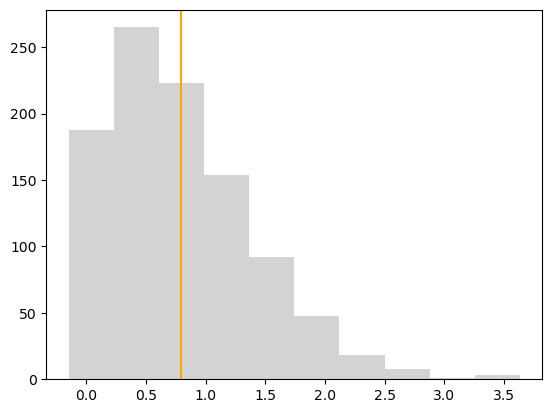

In [3]:
# The first argument is the skewness.  
x = st.skewnorm.rvs(10, size=1000)

fig, ax = plt.subplots()
plt.axvline(x=np.mean(x), color='orange')
_ = plt.hist(x, color='lightgray')

Many different percentiles could be interesting to consider, here we will plot the deciles, which are the 10th, 20th, ... 90th percentiles.

In [5]:
deciles = np.percentile(x, range(10, 100, 10))
deciles

array([0.11932521, 0.24120425, 0.39061506, 0.51840386, 0.68686918,
       0.86683558, 1.03250904, 1.30291124, 1.64172096])

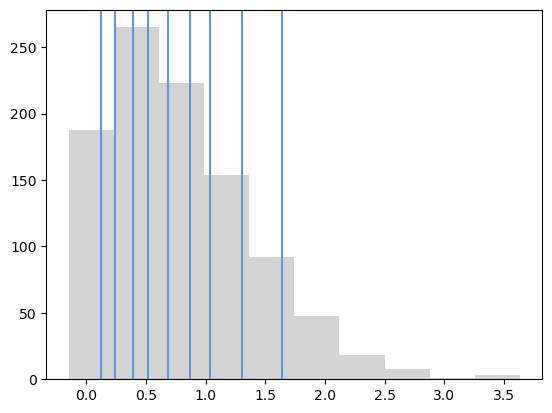

In [6]:
fig, ax = plt.subplots()
[plt.axvline(x=d_i, color='cornflowerblue') for d_i in deciles]
_ = plt.hist(x, color='lightgray')

Seaborn provides a convenient method to create a Box-and-Whisker plot:

<Axes: >

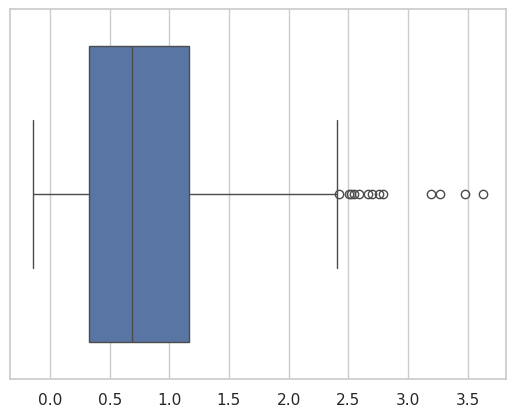

In [8]:
import seaborn as sns

sns.set(style='whitegrid')

sns.boxplot(x=x)

The box edges and line in the center are determined by the quartiles. I.e. the left-most edge of the box is the 25th percentile, the right-most edge of the box is the 75th percentile, and the central line is the median.

The **inter-quartile range** (IQR) is defined by the distance between the box edges:

In [15]:
Q1, Q3 = np.percentile(x, [25, 75])

IQR = Q3 - Q1
IQR

0.8355453811624747

The whiskers are determined by furthest data points within $1.5 \times \text{IQR}$ of the box edges.

In [17]:
Q1 - 1.5*IQR, Q3 + 1.5*IQR

(-0.9262913489005276, 2.415890175749371)

Thus the whiskers are positioned at:

In [19]:
# Thus, the whiskers are positioned at:
x = np.array(x)
np.min(x[x >= Q1 - 1.5 * IQR]), np.max(x[x <= Q3 + 1.5 * IQR])

(-0.1466884247240833, 2.4062385588337536)

Since the smalled value of $x$ lies within the whiskers, there are no values to the left of the Box plot. To the right, there are 13 values beyond the whisker. These values are considered **outliers** and are plotted as individual points:

In [23]:
print(x[x >= Q3 + 1.5 * IQR], "\n", len(x[x >= Q3 + 1.5 * IQR]))

[2.59147516 2.51902379 2.79357511 2.50208924 3.18928374 3.63300294
 2.55165877 2.69719118 2.42615918 2.66179812 2.76123147 3.48247779
 3.26602444] 
 13


## Practical Example

Let us examine how tips vary with whether someone is a smoker or not.

In [24]:
tips = sns.load_dataset('tips')
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


<Axes: xlabel='day', ylabel='tip'>

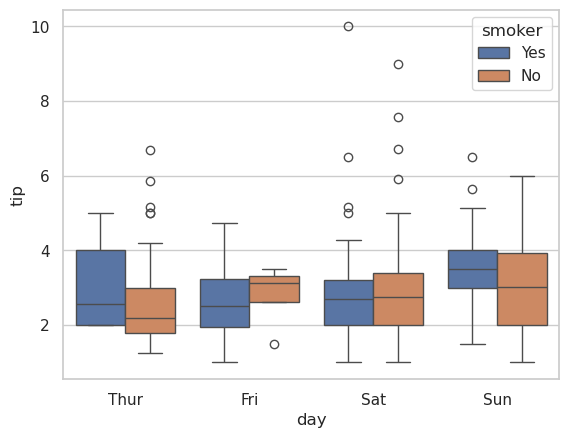

In [29]:
sns.boxplot(x='day', y='tip', hue='smoker', data=tips)